In [1]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize

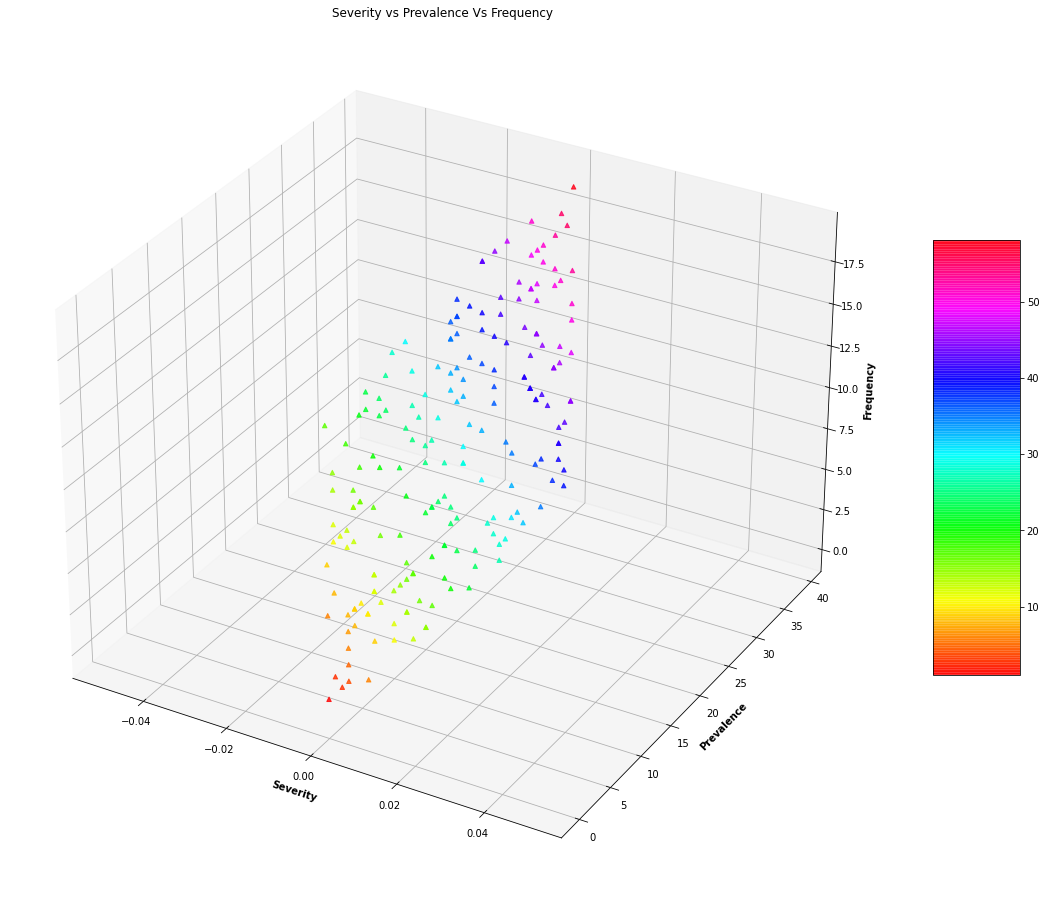

In [2]:
# Creating dataset 
z = np.random.randint(20, size =(200))
x = np.random.randint(1, size =(200))
y =np.random.randint(40, size =(200))
  
# Creating figure 
fig = plt.figure(figsize = (20, 16)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
  
# Creating color map 
my_cmap = plt.get_cmap('hsv') 
  
# Creating plot 
sctt = ax.scatter3D(x, y, z, 
                    alpha = 0.8, 
                    c = (x + y + z),  
                    cmap = my_cmap,  
                    marker ='^') 
  
plt.title("Severity vs Prevalence Vs Frequency") 
ax.set_xlabel('Severity', fontweight ='bold')  
ax.set_ylabel('Prevalence', fontweight ='bold')  
ax.set_zlabel('Frequency', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]


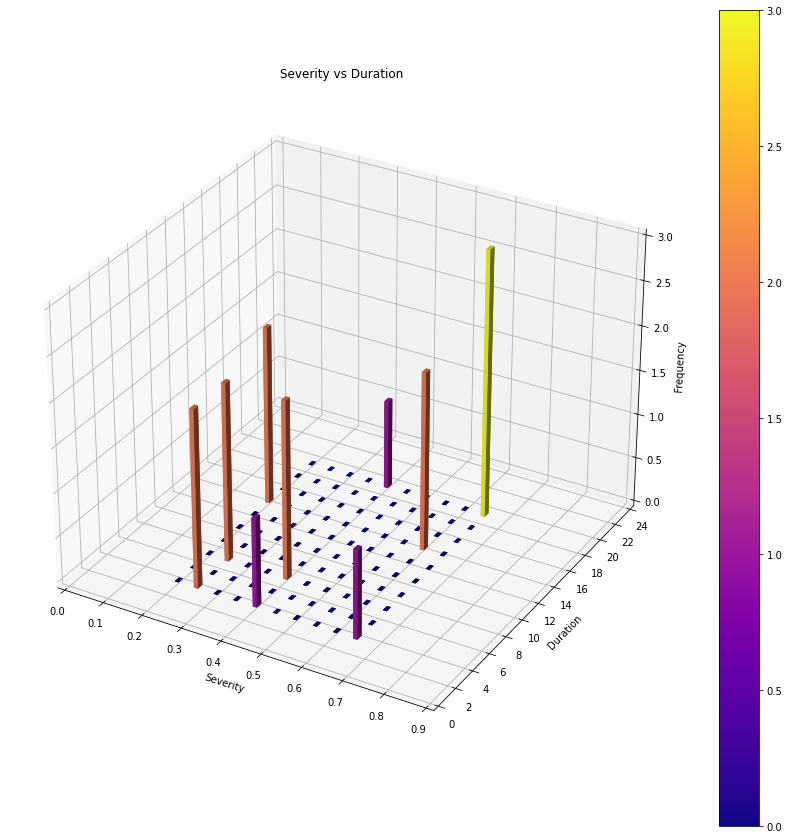

In [3]:
# %matplotlib notebook
# %matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
xAmplitudes= [0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
yAmplitudes =[5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10]

from matplotlib import cm
x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)

# Creating figure 
fig = plt.figure(figsize = (15,15))       #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[:-1], yedges[:-1]+yedges[:-1])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] -  xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
print(xedges)
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in dz] 
# norm = matplotlib.colors.Normalize(0,100)
# cmap = cm.coolwarm
# cmap.set_under((0,0,0,0), alpha=0.0)

cmap = cm.get_cmap('plasma')
norm = Normalize(vmin=min(dz), vmax=max(dz))
colors = cmap(norm(dz))
sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
plt.colorbar(sc)

ax.bar3d(xpos, ypos, zpos, 0.01,0.5,dz, color=colors)
plt.title("Severity vs Duration")
plt.xlabel("Severity")
plt.ylabel("Duration")
ax.set_zlabel("Frequency")
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 25, 2))
plt.savefig("3d_plot")
plt.show()

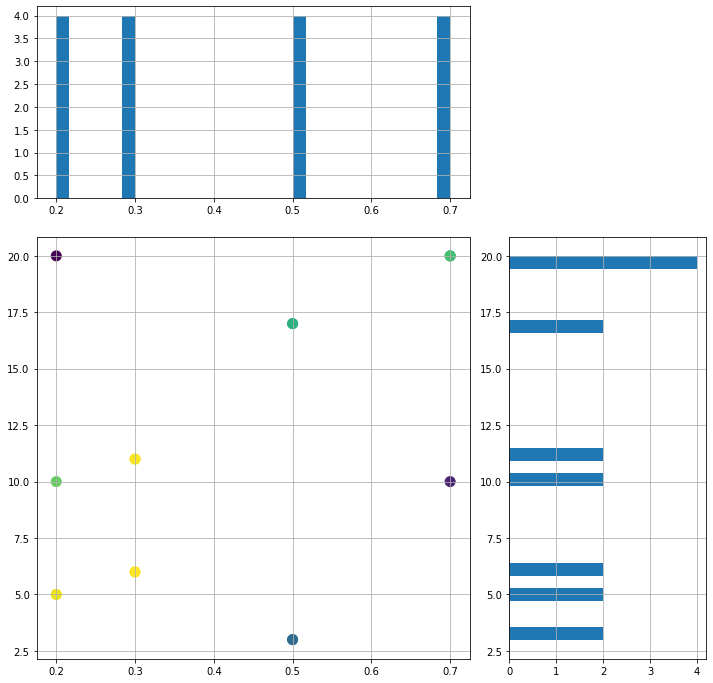

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = xAmplitudes
y = yAmplitudes
x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)
x=x.reshape(-1)
y=y.reshape(-1)
xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)


#plt.scatter(x,y,c=z)
# plt.show()

fig = plt.figure(figsize = (12,12)) 
plt.grid()
scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt.grid()
x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                           sharex=scatter_axes)
plt.grid()
y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                           sharey=scatter_axes)
plt.grid()
nbins = 30

scatter_axes.scatter(x, y, c=z,s=100)
x_hist_axes.hist(x, nbins)
y_hist_axes.hist(y,nbins, orientation='horizontal')

plt.show()
plt.savefig("scatter_hist")

In [5]:
import pandas as pd
%matplotlib notebook
xAmplitudes= [0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
yAmplitudes =[5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10]
xAmplitudes_P= [0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
yAmplitudes_P =[5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10]
df = pd.DataFrame()
df["Severity"]=xAmplitudes
df["Duration"]=yAmplitudes
df["Severity_P"]=xAmplitudes_P
df["Duration_P"]=yAmplitudes_P
plot_df = df.groupby(['Severity','Duration']).size().reset_index(name='Frequency')
plot_df_P = df.groupby(['Severity_P','Duration_P']).size().reset_index(name='Frequency')
plot_df_P["Frequency"]=[2,5,1,3,5,4,4,9,3]
df_merge_col = pd.merge(plot_df, plot_df_P)

#fig = plt.figure(figsize = (10,10))  
fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(12, 8))
# df1.plot(..., ax=axes[0, 0])
# df2.plot(..., ax=axes[1, 0])
plot_df.plot.scatter(x='Duration', y='Severity', s=50 ,
                     c='Frequency', cmap='viridis', ax=ax1,subplots=True,
                        sharex=True, sharey=False,rot=90,
                        xticks=(np.arange(0,25,1)),
                     yticks=(np.arange(0,1,.1)),figsize=(10,10),grid=True)
plot_df_P.plot.scatter(x='Duration_P', y='Severity_P', s=50 ,
                     c='Frequency', cmap='viridis',ax = ax2, rot=90,subplots=True,
                       
                         sharex=True, sharey=False,
                        xticks=(np.arange(0,25,1)),
                     yticks=(np.arange(0,1,.1)),figsize=(10,10),grid=True)


# plt.scatter(plot_df["Severity"],plot_df["Duration"],s=20 * plot_df['Frequency']**2,
#                   cmap='YlOrRd')

plt.savefig("scatter_count_double")


<IPython.core.display.Javascript object>

In [6]:
import plotly.express as px
fig = px.scatter_3d(plot_df, x='Duration', y='Severity', z='Frequency',
                    color='Frequency',size_max=18,opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# ?fig
fig.show()

<IPython.core.display.Javascript object>


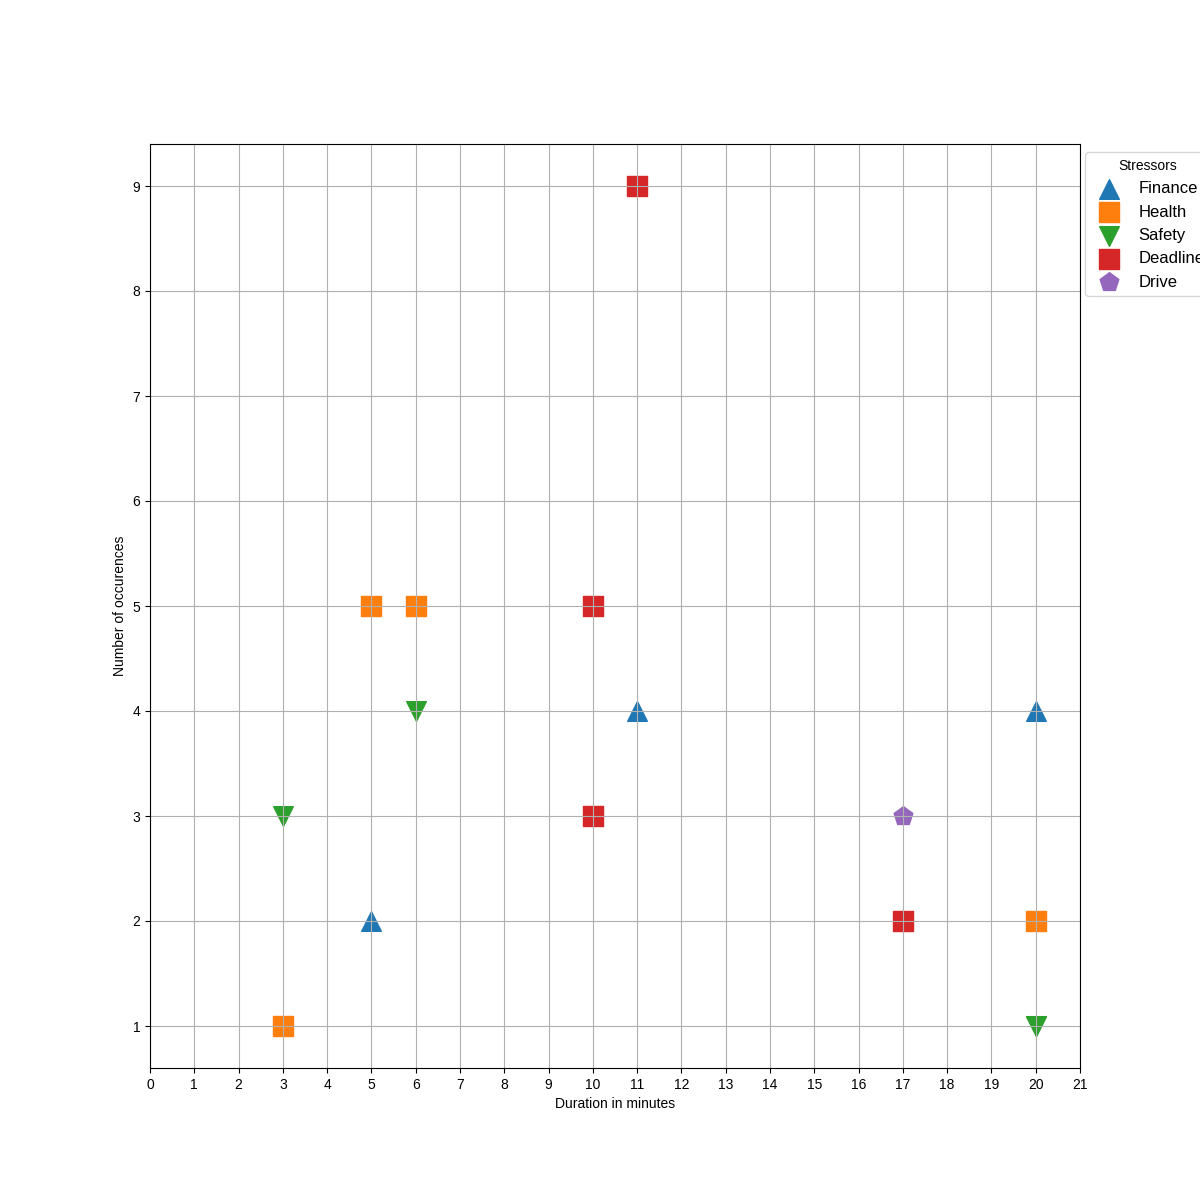

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

x = np.array([5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
df = pd.DataFrame()
df["Severity"]=z
df["Duration"]=x
df["Frequency"]=y
      
cluster = np.array([1,2,3,4,2,3,1,4,3,2,4,5,2,3,1,4]) 

fig, ax = plt.subplots(figsize=(12,12))

a=ax.scatter(x[cluster==1],y[cluster==1], marker='^',s=200)
b=ax.scatter(x[cluster==2],y[cluster==2], marker='s',s=200)
c=ax.scatter(x[cluster==3],y[cluster==3], marker='v',s=200)
d=ax.scatter(x[cluster==4],y[cluster==4], marker='s',s=200)
e=ax.scatter(x[cluster==5],y[cluster==5], marker='p',s=200)
plt.grid()
plt.xlabel("Duration in minutes")
plt.ylabel("Number of occurences")
plt.xticks(np.arange(0, 22, 1.0))
plt.legend((a,b,c,d,e),
           ('Finance', 'Health','Safety','Deadline','Drive'),
           scatterpoints=1,           
           ncol=1,
           fontsize="large",bbox_to_anchor=(1.15, 1), title="Stressors",loc='upper right', prop=fontP)
plt.savefig("new scatter plot.png")
plt.show()

<IPython.core.display.Javascript object>


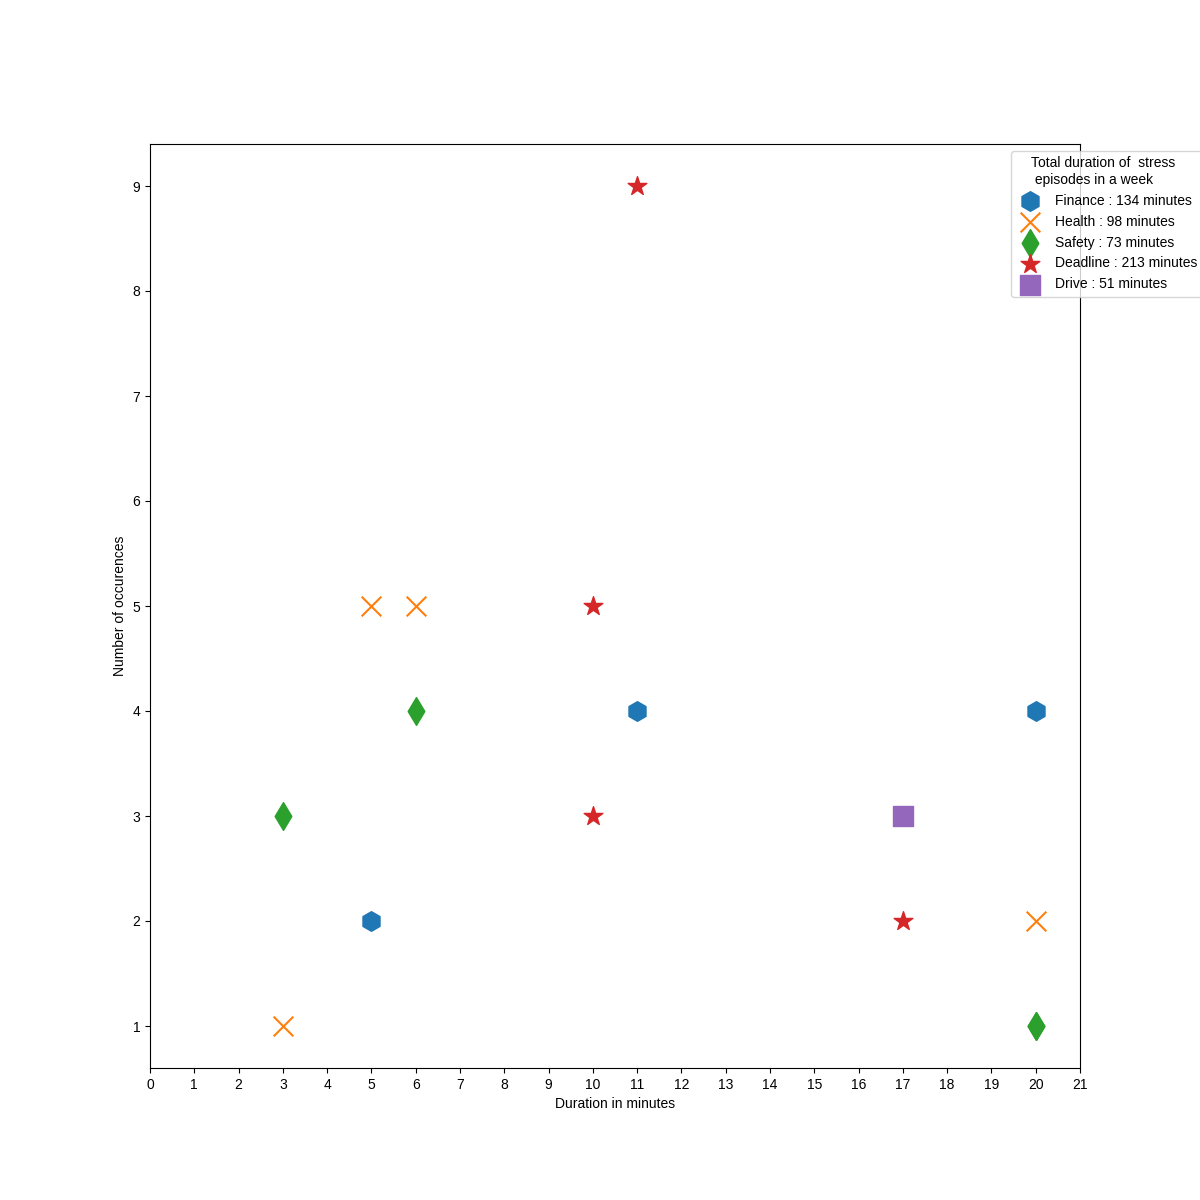

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

x = np.array([5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
cluster = np.array([1,2,3,4,2,3,1,4,3,2,4,5,2,3,1,4]) 
df = pd.DataFrame()
df["Severity"]=z
df["Duration"]=x
df["Frequency"]=y
df["Cluster"]=cluster
marker_cluster={
    1:"h", 
    2:"x", 
    3:"d", 
    4:"*", 
    5:"s", 
     
}      
cluster = np.array([1,2,3,4,2,3,1,4,3,2,4,5,2,3,1,4]) 
cluster_set=set(cluster)
# print(cluster_set)
fig, ax = plt.subplots(figsize=(12,12))
cumulative_sum=[]
for i in cluster_set:
    a=x[cluster==i]
    b=y[cluster==i]
    cumulative_sum.append(sum(a*b))
    ax.scatter(x[cluster==i],y[cluster==i], marker=marker_cluster[i],s=200)
    
plt.grid()
plt.xlabel("Duration in minutes")
plt.ylabel("Number of occurences")
plt.xticks(np.arange(0, 22, 1.0))
lgnd=plt.legend(('Finance ' + ": " + str(cumulative_sum[0]) + " minutes" ,
            'Health ' + ": " + str(cumulative_sum[1]) + " minutes",
            'Safety ' + ": " + str(cumulative_sum[2]) + " minutes",
            'Deadline ' + ": " + str(cumulative_sum[3]) + " minutes",
            'Drive ' + ": " + str(cumulative_sum[4]) + " minutes"),
           scatterpoints=1,           
           ncol=1,
           fontsize=10,bbox_to_anchor=(1.14, 1), title="Total duration of  stress  \n episodes in a week",loc='upper right')
plt.grid()
plt.savefig("new scatter plot.png",dpi=96,bbox_extra_artists=(lgnd,), bbox_inches='tight')
plt.gca()
plt.show()
import base64
from io import BytesIO
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html =  '<img src=\'data:image/png;base64,{}\'>'.format(encoded) 

with open('new_scatter_plot.html','w') as f:
    f.write(html)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })

<IPython.core.display.Javascript object>


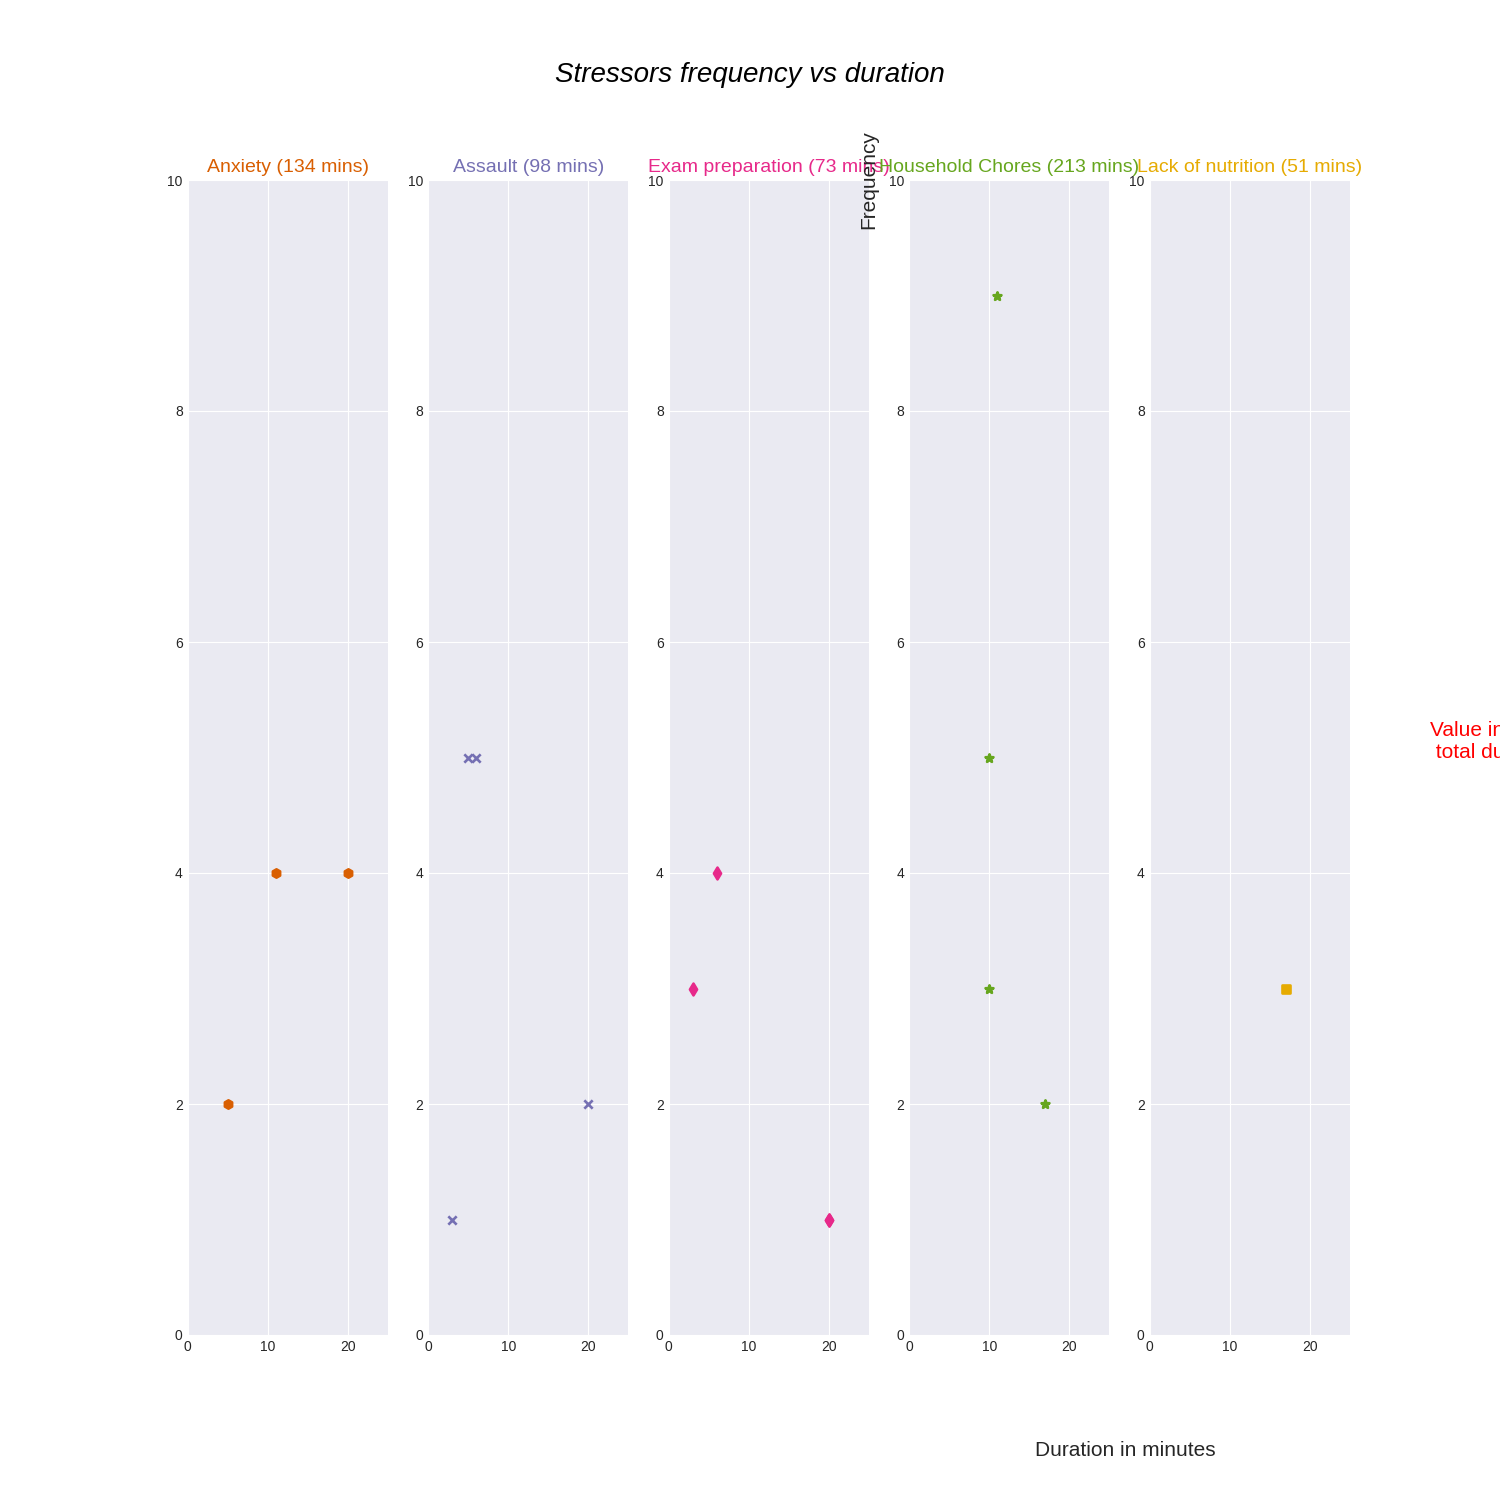

In [10]:
x = np.array([5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
cluster = np.array([1,2,3,4,2,3,1,4,3,2,4,5,2,3,1,4]) 
df = pd.DataFrame()
df["Severity"]=z
df["Duration"]=x
df["Frequency"]=y
df["Cluster"]=cluster
cluster={
    1:"Anxiety", 
    2:"Assault", 
    3:"Exam preparation", 
    4:"Household Chores", 
    5:"Lack of nutrition", 
}
marker_cluster={
    "Anxiety":"h", 
    "Assault":"x", 
    "Exam preparation":"d", 
    "Household Chores":"*", 
    "Lack of nutrition":"s", 
     "Late arrival":"p",
    "Loneliness":"1",
    "Missed payment":"8",
    "Stuck in traffic":"o", 
    "Unclear expectations":"p"
}
df['Stressors'] = df['Cluster'].map(cluster)
num=0
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Dark2')
fig, ax = plt.subplots(figsize=(15,15))
for i  in df.Stressors.unique():
    num+=1 
    # Find the right spot on the plot
    plt.subplot(1,5, num)
    temp=df[df.Stressors==i]
    a=temp.Duration.values
    b=temp.Frequency.values
    total_sum=sum(a*b)
    plt.scatter(temp['Duration'], temp['Frequency'], marker=marker_cluster[i], color=palette(num), linewidth=1.9,  alpha=1, label=i)
    plt.xlim(0,25)
    plt.ylim(0,10)

    plt.title(i + " ("+str(total_sum) + " mins)", loc='center', fontsize=14, fontweight=0, color=palette(num) )
plt.suptitle("Stressors frequency vs duration", fontsize=20, fontweight=0, ha='center', va='center',color='black', style='italic',y=0.95)

# Axis title
plt.text(-3,-1, 'Duration in minutes', ha='center', va='center',fontsize=15)
plt.text(-35, 10, 'Frequency', ha='center', va='center', rotation='vertical',fontsize=15)
plt.text(35,5,"Value in parenthesis indicates \n total duration of stressed episodes for that stressor in this week",fontsize=15,c="r")
plt.savefig("min_bar.png")
import base64
from io import BytesIO
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('min_bar.html','w') as f:
    f.write(html)

<IPython.core.display.Javascript object>


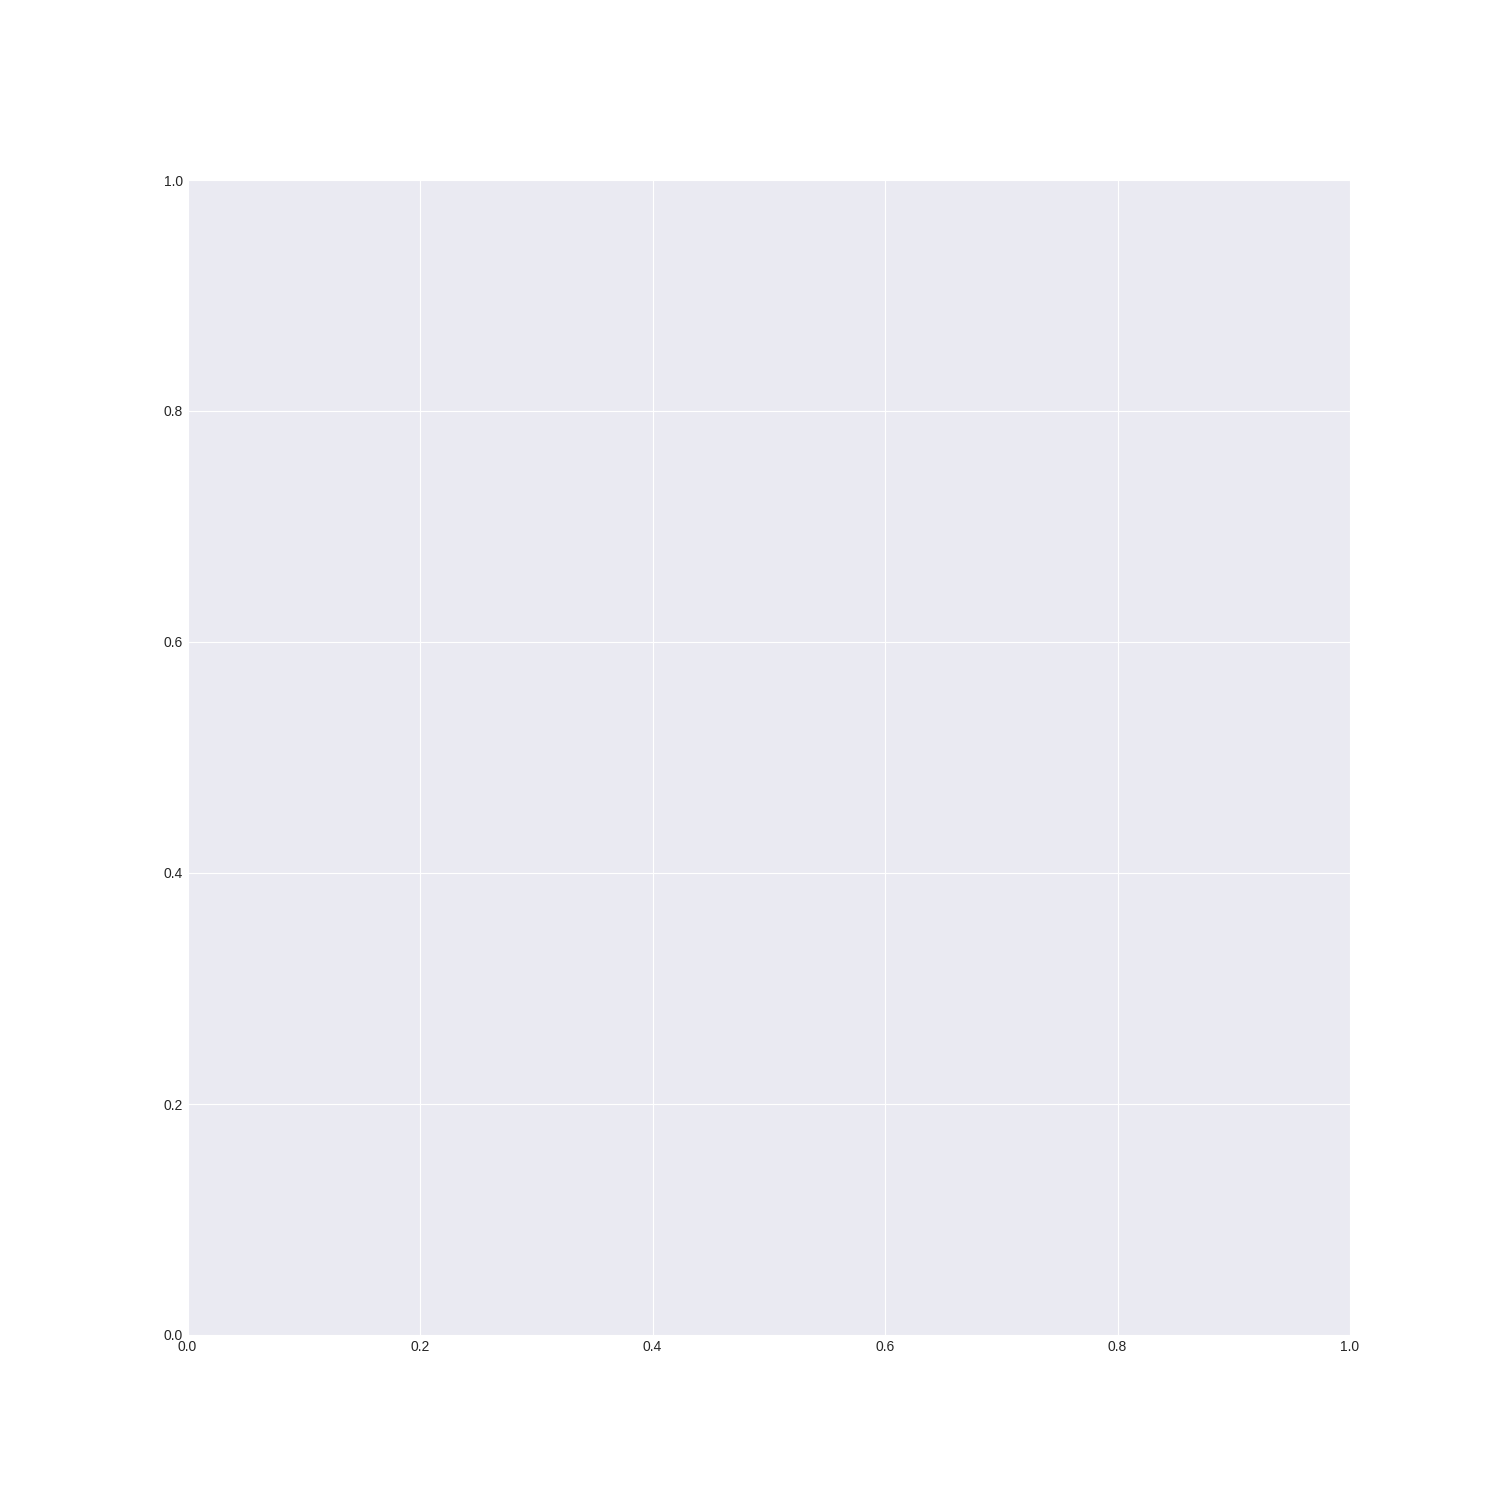

AttributeError: 'DataFrame' object has no attribute 'Day'

In [11]:
x = np.array([5,5,20,10,6,6,11,11,3,3,17,17,20,20,20,10])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
cluster = np.array([1,2,3,4,2,3,1,4,3,2,4,5,2,3,1,4]) 
df = pd.DataFrame()
df["Severity"]=z
df["Duration"]=x
df["Frequency"]=y
df["Cluster"]=cluster
cluster={
    1:"Anxiety", 
    2:"Assault", 
    3:"Exam preparation", 
    4:"Household Chores", 
    5:"Lack of nutrition", 
}
marker_cluster={
    "Anxiety":"h", 
    "Assault":"x", 
    "Exam preparation":"d", 
    "Household Chores":"*", 
    "Lack of nutrition":"s", 
     "Late arrival":"p",
    "Loneliness":"1",
    "Missed payment":"8",
    "Stuck in traffic":"o", 
    "Unclear expectations":"p"
}
df['Stressors'] = df['Cluster'].map(cluster)
num=0
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Dark2')
fig, ax = plt.subplots(figsize=(15,15))
for i  in df.Day.unique():
    num+=1 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
    temp=df[df.Day==i]
    a=temp.Location.values
    b=temp["Time of day"].values
    total_sum=sum(a*b)
    plt.scatter(temp['Location'], temp['Frequency'], marker=marker_cluster[i], color=palette(num), linewidth=1.9,  alpha=1, label=i)
    plt.xlim(0,25)
    plt.ylim(0,10)

    plt.title(i + " ("+str(total_sum) + " mins)", loc='center', fontsize=14, fontweight=0, color=palette(num) )
plt.suptitle("Stressors frequency vs duration", fontsize=20, fontweight=0, ha='center', va='center',color='black', style='italic',y=0.95)

# Axis title
plt.text(-3,-1, 'Duration in minutes', ha='center', va='center',fontsize=15)
plt.text(-35, 10, 'Frequency', ha='center', va='center', rotation='vertical',fontsize=15)
plt.text(35,5,"Value in parenthesis indicates \n total duration of stressed episodes for that stressor in this week",fontsize=15,c="r")
plt.savefig("min_bar.png")
import base64
from io import BytesIO
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('min_bar.html','w') as f:
    f.write(html)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


x = np.array([5,5,20,8,6,6,11,11,3,3,18,17,19,20,21,9,5,5,20,8,6,6,11,11,3,3,18,17,19,20,21,9])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5,2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
cluster = np.array([1,2,3,4,5,3,1,4,3,2,4,5,2,3,1,4,1,2,3,4,5,3,1,4,3,2,4,5,2,3,1,4]) 
cluster_map={
    1:"Anxiety", 
    2:"Assault", 
    3:"Exam preparation", 
    4:"Household Chores", 
    5:"Lack of nutrition", 
}
df = pd.DataFrame()
df["Severity"]=z
df["Duration of each stress episode (mins)"]=x
df["Frequency"]=y
df["Cluster"]=cluster
# df["Total Duration of stress episodes (mins) in this week"]=df["Frequency"]*df["Duration of each stress episode (mins)"]
df["Total Duration of stress episodes (mins)"]=df["Frequency"]*df["Duration of each stress episode (mins)"]
df['Stressors'] = df['Cluster'].map(cluster_map)
order=["Household Chores","Anxiety","Assault","Exam preparation","Lack of nutrition"]
df['Stressors'] = pd.Categorical(df['Stressors'], categories=order, ordered=True)
df = df.sort_values('Stressors')

In [ ]:
len(df)

In [ ]:
cluster_sum={}
for i in df.Cluster.unique():
    temp=df[df.Cluster == i]
#     print(temp)
    cluster_sum[i]=temp["Total Duration"].values.tolist()

In [ ]:
df.Stressors.unique()

In [ ]:
max_index=max(cluster_sum, key=lambda k: len(cluster_sum[k]))
max_len=len(cluster_sum[max_index])
lists = [[] for _ in range(len(cluster_sum))]
origlist=[]

for i in cluster_sum:
    zeros_add=max_len-len(cluster_sum[i])
    temp=[]
    if zeros_add !=0:
        temp=list(np.pad(cluster_sum[i], (0, zeros_add), 'constant'))
        cluster_sum[i]=temp
        origlist.append(temp)

    else:
        cluster_sum[i]=cluster_sum[i]
        origlist.append(cluster_sum[i])

def Extract(lst,i): 
    return [item[i] for item in lst] 


In [ ]:
modified_list=[]
for i in range(max_len):
    modified_list.append(Extract(origlist,i))

In [ ]:
modified_list

In [ ]:
import plotly.express as px

# long_df = px.data.medals_long()

# fig = px.bar(df, x="Stressors", y="Total Duration of stress episodes",  color="Frequency",text="Duration of each stress episode", 
#              title="Stressors Prevalence",
#              width=800, height=1000)
color=["r","b","g","y","o"]
fig = px.bar(df, x="Stressors", y="Total Duration of stress episodes (mins)",  color="Frequency",
             hover_name="Stressors", hover_data=["Duration of each stress episode (mins)", "Frequency","Total Duration of stress episodes (mins)"],
             title="Stressors Prevalence",
            
             width=800, height=1000)
fig.update_xaxes(title_text='Stressors')
fig.update_yaxes(title_text='Total Duration of stress episodes (mins) in this week')
fig.update_yaxes(nticks=20)
fig.show()
plotly.offline.plot(fig, filename='prevalence_1.html')

In [ ]:
import plotly.express as px

# long_df = px.data.medals_long()

# fig = px.bar(df, x="Stressors", y="Total Duration of stress episodes",  color="Frequency",text="Duration of each stress episode", 
#              title="Stressors Prevalence",
#              width=800, height=1000)
color=["r","b","g","y","o"]
values=df.Frequency.values.tolist()
fig = px.bar(df, x="Stressors", y="Total Duration of stress episodes (mins)",  color="Stressors",
             hover_name="Stressors", hover_data=["Duration of each stress episode (mins)", "Frequency","Total Duration of stress episodes (mins)"],
             title="Stressors Prevalence",
             text=  "Frequency",
             labels = "Frequency",             
             width=800, height=1000)
fig.update_xaxes(title_text='Stressors')
fig.update_yaxes(title_text='Total Duration of stress episodes (mins) in this week')
fig.update_layout(showlegend=False) 
fig.update_yaxes(nticks=20)
fig.update_yaxes(automargin=True)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.show()
plotly.offline.plot(fig, filename='prevalence_2.html')

In [14]:
import pandas as pd
import plotly.express as px
# df = pd.read_csv('car_design.csv')

fig = px.box(df, x="Stressors", y="Duration of each stress episode (mins)",color="Stressors")
fig.update_layout(showlegend=False) 

fig.show()
plotly.offline.plot(fig, filename='box_plot.html')

NameError: name 'plotly' is not defined

In [ ]:
df

In [16]:
import plotly.express as px
import plotly
fig = px.violin(df, x="Stressors", y="Duration of each stress episode (mins)", box=True, points="all")
fig.show()
plotly.offline.plot(fig, filename='violin.html')
    
    

'violin.html'

In [17]:
import plotly.express as px

fig = px.violin(df, x="Stressors", y="Duration of each stress episode (mins)",color="Stressors", box=True, points="all")
fig.show()
plotly.offline.plot(fig, filename='violin_color.html')

'violin_color.html'

In [20]:

import plotly.graph_objects as go
fig = go.Figure()
stressors =df.Stressors.unique()

for stressor in stressors:
    fig.add_trace(go.Violin(x=df['Stressors'][df['Stressors'] == stressor],
                            y=df['Duration of each stress episode (mins)'][df['Stressors'] == stressor],
                            name=stressor,
                            box_visible=True,
                            meanline_visible=True))
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count')
fig.update_yaxes(title_text='Duration of each stress episode (mins)')
fig.show()
plotly.offline.plot(fig, filename='violin_color1.html')

'violin_color1.html'

In [ ]:
fig = go.Figure()

stressors =df.Stressors.unique()

for stressor in stressors:
    fig.add_trace(go.Box(x=df['Stressors'][df['Stressors'] == stressor],
                            y=df['Duration of each stress episode (mins)'][df['Stressors'] == stressor],
                        name=stressor))
fig.update_yaxes(title_text='Duration of each stress episode (mins)')
fig.show()
plotly.offline.plot(fig, filename='box_go.html')